# Problem Statement

I decided to treat this as a classification problem by creating a new binary variable affair
(did the woman have at least one affair?) and trying to predict the classification for each
woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =
college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 =
"white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from patsy import dmatrices
from sklearn import metrics
import statsmodels.api as sm

In [2]:
#Read Data
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
#uderstanding the datatype
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [5]:
#Converting Affairs into categorical
#add "affair" column: 1 represents having affairs, 0 represents not
dta['affairs'] = (dta['affairs']>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [6]:
# Check columns in the table
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [7]:
#Data description
dta.describe(include='all')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


rate_marriage  1.0  2.0  3.0   4.0   5.0
affairs                                 
0               25  127  446  1518  2197
1               74  221  547   724   487


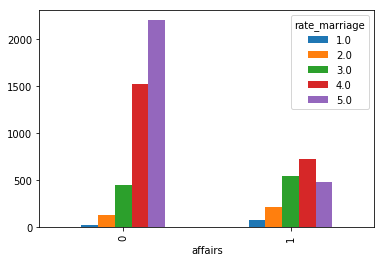

In [8]:
#Cross-tabulation of data 1
print(pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']).plot(kind='bar')

age      17.5  22.0  27.0  32.0  37.0  42.0
affairs                                    
0         126  1394  1298   644   364   487
1          13   406   633   425   270   306


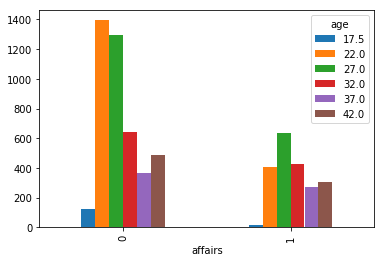

In [9]:
#Cross-tabulation of data 2
print(pd.crosstab(dta['affairs'],dta['age'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['age'],rownames=['affairs']).plot(kind='bar')

yrs_married  0.5   2.5   6.0   9.0   13.0  16.5  23.0
affairs                                              
0             354  1595   754   348   347   449   466
1              16   439   387   254   243   369   345


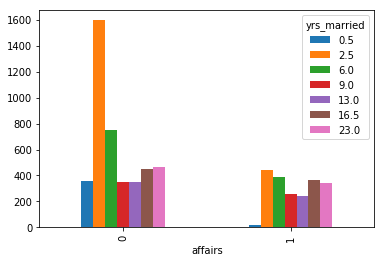

In [10]:
#Cross-tabulation of data 3
print(pd.crosstab(dta['affairs'],dta['yrs_married'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['yrs_married'],rownames=['affairs']).plot(kind='bar')

children   0.0  1.0  2.0  3.0  4.0  5.5
affairs                                
0         1912  747  873  460  197  124
1          502  412  608  321  131   79


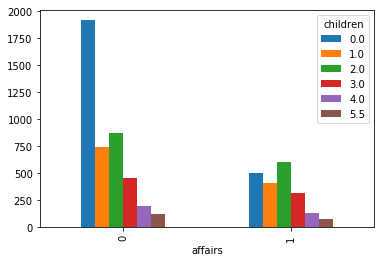

In [11]:
#Cross-tabulation of data 4
print(pd.crosstab(dta['affairs'],dta['children'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['children'],rownames=['affairs']).plot(kind='bar')

religious  1.0   2.0   3.0  4.0
affairs                        
0          613  1448  1715  537
1          408   819   707  119


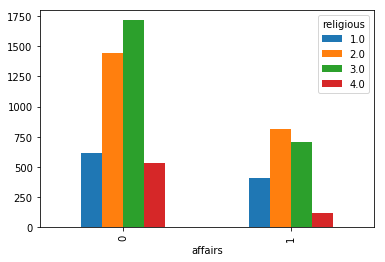

In [12]:
#Cross-tabulation of data 5
print(pd.crosstab(dta['affairs'],dta['religious'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['religious'],rownames=['affairs']).plot(kind='bar')

educ     9.0   12.0  14.0  16.0  17.0  20.0
affairs                                    
0          27  1361  1469   844   370   242
1          21   723   808   273   140    88


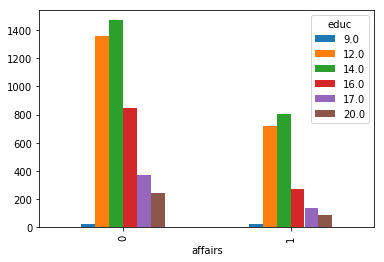

In [13]:
#Cross-tabulation of data 6
print(pd.crosstab(dta['affairs'],dta['educ'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['educ'],rownames=['affairs']).plot(kind='bar')

occupation  1.0  2.0   3.0   4.0  5.0  6.0
affairs                                   
0            34  607  1818  1354  431   69
1             7  252   965   480  309   40


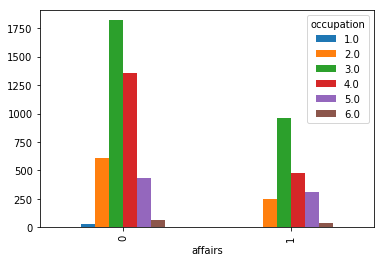

In [14]:
#Cross-tabulation of data 7
print(pd.crosstab(dta['affairs'],dta['occupation'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['occupation'],rownames=['affairs']).plot(kind='bar')

occupation_husb  1.0  2.0  3.0   4.0   5.0  6.0
affairs                                        
0                181  882  317  1391  1177  365
1                 48  426  173   639   602  165


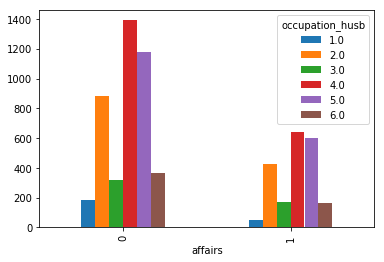

In [15]:
#Cross-tabulation of data 8
print(pd.crosstab(dta['affairs'],dta['occupation_husb'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['occupation_husb'],rownames=['affairs']).plot(kind='bar')

In [16]:
# Description of affairs
dta.groupby('affairs').describe()

rate_marriage                                                  age  \
                count      mean       std  min  25%  50%  75%  max   count   
affairs                                                                      
0              4313.0  4.329701  0.821099  1.0  4.0  5.0  5.0  5.0  4313.0   
1              2053.0  3.647345  1.065286  1.0  3.0  4.0  4.0  5.0  2053.0   

                    ... occupation      occupation_husb                      \
              mean  ...        75%  max           count      mean       std   
affairs             ...                                                       
0        28.390679  ...        4.0  6.0          4313.0  3.833758  1.361392   
1        30.537019  ...        4.0  6.0          2053.0  3.884559  1.314123   

                                  
         min  25%  50%  75%  max  
affairs                           
0        1.0  3.0  4.0  5.0  6.0  
1        1.0  3.0  4.0  5.0  6.0  

[2 rows x 64 columns]

In [17]:
# Create dataframes with an intercept column and dummy variables for occupation and occupation_husb
y, x = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious \
                    + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [18]:
x.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [19]:
y.columns

Index(['affairs'], dtype='object')

In [20]:
# Flatten y into a 1-D array
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

# Apply Logistic Regression with use of Statsmodel.Logit function 

In [21]:
# Fit model
logit = sm.Logit(y, x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [22]:
# Model summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.137      
Dependent Variable:     y                  AIC:                6946.3465  
Date:                   2019-04-20 01:46   BIC:                7061.2449  
No. Observations:       6366               Log-Likelihood:     -3456.2    
Df Model:               16                 LL-Null:            -4002.5    
Df Residuals:           6349               LLR p-value:        1.5339e-222
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         6.0000                                            
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
C(occupation)[T.2.0]       0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
C(occupation)[T.3.0]       0.7027   0.4415   1.5917 0.1114 -0.1626  1.5679
C(occupation)[T.4.0]       0.4714   0.4425   1.0652 0.2868 -0.3959  1.3387
C(occupation)[T.5.0]       1.0542   0.4466   2.3603 0.0183  0.1788  1.9296
C(occupation)[T.6.0]       1.1080   0.4942   2.2420 0.0250  0.1394  2.0767
C(occupation_husb)[T.2.0]  0.1704   0.1861   0.9160 0.3597 -0.1943  0.5352
C(occupation_husb)[T.3.0]  0.2842   0.2022   1.4057 0.1598 -0.1121  0.6804
C(occupation_husb)[T.4.0]  0.1428   0.1810   0.7892 0.4300 -0.2119  0.4976
C(occupation_husb)[T.5.0]  0.1723   0.1826   0.9436 0.3454 -0.1856  0.5303
C(occupation_husb)[T.6.0]  0.1828   0.2037   0.8974 0.3695 -0.2164  0.5819
rate_marriage             -0.7102   0.0315 -22.5600 0.0000 -0.7719 -0.6485
age                       -0.0613   0.0103  -5.9361 0.0000 -0.0815 -0.0410
yrs_married                0.1080   0.0110   9.8364 0.0000  0.0865  0.1295
children                   0.0156   0.0321   0.4881 0.6255 -0.0472  0.0785
religious                 -0.3754   0.0349 -10.7657 0.0000 -0.4437 -0.3070
educ                      -0.0017   0.0174  -0.0992 0.9210 -0.0358  0.0324
==========================================================================

"""

# Apply Logistic Regression with use of SKLearn.LogisticRegression

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [29]:
# Fit model
model = LogisticRegression()
model = model.fit(x,y)

C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# Model accuracy
model.score(x, y)

0.7258875274897895

In [33]:
aff = y.mean()
print("what percentage had affairs?>>",aff)

what percentage had affairs?>> 0.3224945020420987


Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
So we're doing better than the null error rate, but not by much!!!

In [34]:
# Examine the coefficients
for el in zip(x.columns, np.transpose(model.coef_).tolist()):
    print(el)

('Intercept', [1.489835891324933])
('C(occupation)[T.2.0]', [0.18806639024440983])
('C(occupation)[T.3.0]', [0.4989478668156914])
('C(occupation)[T.4.0]', [0.25066856498524825])
('C(occupation)[T.5.0]', [0.8390080648117001])
('C(occupation)[T.6.0]', [0.8339084337443315])
('C(occupation_husb)[T.2.0]', [0.1906359445867889])
('C(occupation_husb)[T.3.0]', [0.2978327129263421])
('C(occupation_husb)[T.4.0]', [0.1614088540760616])
('C(occupation_husb)[T.5.0]', [0.18777091388972483])
('C(occupation_husb)[T.6.0]', [0.19401637225511495])
('rate_marriage', [-0.7031233597323255])
('age', [-0.05841777448168919])
('yrs_married', [0.10567653799735635])
('children', [0.016919266970905608])
('religious', [-0.3711362653137546])
('educ', [0.00401650319563816])


In [35]:
# Evaluate the model by splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
# Shape of the data
x_train.shape, x_test.shape, y_test.shape, y_test.shape

((4456, 17), (1910, 17), (1910,), (1910,))

In [37]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Predict class labels for the test set
predicted = model2.predict(x_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [40]:
# Generate class probabilities
probs = model2.predict_proba(x_test)
probs

array([[0.3514634 , 0.6485366 ],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727385, 0.44272615],
       [0.81207043, 0.18792957],
       [0.74734601, 0.25265399]])

In [41]:
# Generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7298429319371728
0.745950606950631


In [42]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [44]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\msi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

(array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
        0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ]),
 0.7241630685514876)

# Looks good. It's still performing at 73% accuracy.